<div style="display: flex; justify-content: space-between; align-items: center; margin: 0px 0px 5px 0px;">
    <div style="text-align: left;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/b/b6/HULT_IBS_Logo_Outline_Black_%28cropped%29.png" width="150" style="margin: 10px 0px 5px 0px;"/>
        <div style="margin: 0px 0px 0px 0px;">
            <span style="font-size: 12px; color: #808080;"><b>Program:</b> Master's in Business Analytics (Dual Degree)<br></span>
            <span style="font-size: 12px; color: #808080;"><b>Professor:</b> Sílvia Ariza Sentís<br></span>
            <span style="font-size: 12px; color: #808080;"><b>Date:</b> 06 December 2023<br></span>
        </div>
    </div>
    
<div style="float: center; margin: 10px 15px 15px 70px; text-align: center;">
        <a href="https://www.lovoo.com/" target="_blank" style="color: #2B547E;">
            <img src="https://www.datingscout.com/b6/image/upload/ds/upload/reviews/ENG/lovoo/lovoo-logo.png" style="border: 0px solid #2B547E; border-radius: 0%; width: 150px;">
        </a>
        <br>
        <b style="font-size: 14px; color: #2B547E; display: block;">Team 4:</b>
        <b style="font-size: 14px; color: #2B547E; display: block;">Carla Forte, Dejanire Bernal,</b>
        <b style="font-size: 14px; color: #2B547E; display: block;">Suraj Udasi and Yoshiyuki Watabe</b>
    </div>

<div style="text-align: right; margin: 15px 0px 0px 97px;">
        <b style="font-size: 20px; color: #808080;">A2: Group Assignment </b><br>
        <em style="font-size: 12px; color: #808080;"><strong>Python for Data Analysts: Methods & Tools</strong></em><br><br>
        <a href="https://www.kaggle.com/datasets/utkarshx27/lovoo-dating-app-dataset/data" target="_blank" style="color: #2B547E">
            <em style="font-size: 16px; color: #2B547E;"><strong>Dating App Fame & Behavior</strong></em>
        </a>
        <br>
        <em style="font-size: 12px; color: #808080;">Analyzing and Visualizing Data with Python</em><br>
    </div>
</div>


# Introduction to the data frame - Dating App API Results

When Dating apps like Tinder were becoming viral, people wanted to have the best profile to get more matches and more potential encounters.
Unlike other previous dating platforms, those new ones emphasized the mutuality of attraction before allowing any two people to get in touch and chat. This made it all the more important to create the best profile to get the best first impression.

Parallel to that, humans have always been in awe of charismatic and inspiring people. The more charismatic people tend to be followed and listened to by more people. Through their metrics such as the number of friends/followers, social networks give some ways of "measuring" the potential charisma of some people. With all that, one can then think:

### What makes a great user profile ?

We want to identify what, if any, correlations exist between Age Group Differences in Online Activity and Engagement, Geographical Influence on User Behavior, Number of Profile Pictures, Profile Visits, and Kisses and finally Engagement with or without Verified Status. Ideally, these findings could contribute to a certain set of recommendations for those who want to be successful on dating sites.

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")  # This is to ignore any warnings that might pop up during execution

In [2]:
# Basic libraries to manipulate data
import pandas as pd                # data manipulation and wrangling
import numpy as np                 # numerical and scientific computing
import matplotlib.pyplot as plt    # general data visualization
import seaborn as sns              # interface for statistical visualization
import plotly.express as px
import sklearn                     # for machine learning
import statsmodels.api as sm       # for statistic models
import sqlite3                     # SQL data management
import os                          # for reading working directory
import matplotlib.ticker as mtick  # Import the ticker module for formatting

from scipy import stats	
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
np.random.seed(42)  # To ensure all the probabilistic things are reproducible

## Background on Data

#### i. Dataset
For this analysis, we took the data from the Kaggle website (https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results).

As per the dataset collector and owner, a set of tools was developed that saved the data while browsing through profiles and doing searches. Because of this approach, the data only includes user profiles that were recommended by Lovoo's algorithm for 2 profiles that were created for this purpose (male, open to friends & chats & dates). Resulting in only female users in the dataset.

**Regarding the number of user profiles**

It turned out that the recommendation algorithm always seemed to output the same set of user profiles. This meant Lovoo's algorithm was probably heavily relying on settings like location (to recommend more people nearby than people in different places or countries) and maybe cookies. This diminished the number of different user profiles that would be presented and included in the dataset.

#### ii. Scope & Procedures
This analysis is based on the dataset that was gathered during spring 2015 (april, may). At that time, Lovoo was expanding in european countries (among others), while Tinder was trending both in America and in Europe

# Relative Paths
To ensures code portability and for reading data from files, we use a relative path—i.e., a path originating from the project directory. This way, being in the correct directory ensures smooth execution. 

Make sure to give this project its own directory. At the top level, this notebooks will reside, while the dataset will be stored in a directory named "data."

Consequently, the defined relative path for data will effortlessly read files by appending the correct file name from there.

In [4]:
# Specify the path to the datasets
data_path = "./data/"

# Specify the filenames of the datasets
appresults_filename = "lovoo_v3_users_api-results.csv"

# Read the CSV files and create backup copies
appresults_df_data = pd.read_csv(data_path + appresults_filename)

# Create working copies of the dataframes for analysis
appresults_df = appresults_df_data.copy()

In [5]:
# Taking a look at the data 
pd.set_option('display.max_columns', None)
appresults_df.sample(5)

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,country,city,location,distance,isFlirtstar,isHighlighted,isInfluencer,isMobile,isNew,isOnline,isVip,lang_count,lang_fr,lang_en,lang_de,lang_it,lang_es,lang_pt,verified,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,pictureId,userId,isSystemProfile
3960,F,M,24,Mon**a,1.00,7,6064,507,0,0,False,False,False,CH,Lausanne,Prilly,NaN,0,0,0,1,0,1,0,1,False,False,False,True,False,False,1,1,2015-04-06T15:47:45Z,1.428335e+09,0,1.0,NaN,"tous des créatures de Dieu, y'a pas de VIP!!!",CRY14a1Hq8PbPcHH6U1sBAdAZrORDhROWycfZL6ahAMD90...,7e0ddbdb1bd293c96d4a5ec5d0466923,NaN
3742,F,M,20,Baby e,0.00,1,483,11,0,0,False,True,True,CH,Lausanne,Lausanne,2.0,0,0,0,1,1,0,0,0,False,False,False,False,False,False,0,1,2015-04-26T15:17:38Z,1.430061e+09,0,NaN,NaN,NaN,553442cf553fcbdc7ef1cb5b,553442cf553fcbdc7ef1cb5e,NaN
3783,F,M,20,keeeks,0.23,5,382,5,0,0,False,True,False,CH,Zürich,Zürich,173.0,0,0,0,1,1,1,0,1,False,False,True,False,False,False,1,1,2015-04-26T11:42:46Z,1.430049e+09,0,NaN,NaN,NaN,5537cca1c46da118658b4d1d,5537cd1ac96da16e718b462d,NaN
2542,F,none,24,✌️💗✌️,0.00,4,793,19,0,0,True,False,False,DE,NaN,Neuenstein,370.0,0,0,0,1,0,1,0,1,False,False,True,False,False,False,0,1,2015-04-06T16:00:56Z,1.428336e+09,0,NaN,NaN,NaN,551467231b0ba0af4f8b4a81,55146728190ba074648b45a1,NaN
109,F,M,19,tamara,0.65,4,12754,644,0,3,True,False,False,CH,Fribourg,Fribourg,50.4,0,0,0,1,0,0,0,1,False,False,True,False,False,False,0,1,2015-04-26T17:27:46Z,1.430069e+09,0,NaN,NaN,:),511f820f140ba0a91400019a,54cbb2e3cb6da1f5618b456f,NaN


Based on this preliminary look, we can also see the columns that will be of interest - `age`, `counts_pictures`, `counts_profileVisits` etc.

In [6]:
# Let's check its structure
appresults_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  3973 non-null   object 
 1   genderLooking           3973 non-null   object 
 2   age                     3973 non-null   int64  
 3   name                    3973 non-null   object 
 4   counts_details          3973 non-null   float64
 5   counts_pictures         3973 non-null   int64  
 6   counts_profileVisits    3973 non-null   int64  
 7   counts_kisses           3973 non-null   int64  
 8   counts_fans             3973 non-null   int64  
 9   counts_g                3973 non-null   int64  
 10  flirtInterests_chat     3973 non-null   bool   
 11  flirtInterests_friends  3973 non-null   bool   
 12  flirtInterests_date     3973 non-null   bool   
 13  country                 3973 non-null   object 
 14  city                    3686 non-null   

This is a concise summary of the dataset. The index comprises 3973 entries, ranging from 0 to 3972 across 42 columns

A brief description of each column is printed, including its non-null count (there are some columns with null values in this dataset) and data type (dtype).

In [7]:
# Check for missing values
appresults_df.isnull().sum()

gender                       0
genderLooking                0
age                          0
name                         0
counts_details               0
counts_pictures              0
counts_profileVisits         0
counts_kisses                0
counts_fans                  0
counts_g                     0
flirtInterests_chat          0
flirtInterests_friends       0
flirtInterests_date          0
country                      0
city                       287
location                    13
distance                    27
isFlirtstar                  0
isHighlighted                0
isInfluencer                 0
isMobile                     0
isNew                        0
isOnline                     0
isVip                        0
lang_count                   0
lang_fr                      0
lang_en                      0
lang_de                      0
lang_it                      0
lang_es                      0
lang_pt                      0
verified                     0
sharePro

We can see here that `city`, `location`, `distance`, `crypt`, `freetext`, `whazzup`, `userId` and `isSystemProfile` columns have null values, and don't seem relevant for our analysis, we will drop these columns. 

Additionally, we are not interested with the `name`, `pictureId`, languages (`lang_count`,`lang_fr`,`lang_fr`,`lang_en`,`lang_de`,`lang_it`,`lang_es`,`lang_pt`) `shareProfileEnabled`,`lastOnlineTime` columns either, and we will drop these. 

In [8]:
# Dropping 'name', 'freetext', 'whazzup', 'pictureId', 'isSystemProfile', 'counts_details','counts_g', 'city', 'location','lang_count','lang_fr','lang_fr','lang_en','lang_de','lang_it','lang_es','lang_pt','shareProfileEnabled','lastOnlineTime','crypt', 'userId' columns

drop_columns = ['name', 'freetext', 'whazzup', 'pictureId', 'isSystemProfile', 'counts_details','counts_g', 'city', 'location','lang_count','lang_fr','lang_fr','lang_en','lang_de','lang_it','lang_es','lang_pt','shareProfileEnabled','lastOnlineTime','crypt', 'userId']

# Dropping the columns
appresults_df = appresults_df.drop(drop_columns, axis=1)

In [9]:
# Let's check the structure of the dataset once again after dropping the columns
appresults_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  3973 non-null   object 
 1   genderLooking           3973 non-null   object 
 2   age                     3973 non-null   int64  
 3   counts_pictures         3973 non-null   int64  
 4   counts_profileVisits    3973 non-null   int64  
 5   counts_kisses           3973 non-null   int64  
 6   counts_fans             3973 non-null   int64  
 7   flirtInterests_chat     3973 non-null   bool   
 8   flirtInterests_friends  3973 non-null   bool   
 9   flirtInterests_date     3973 non-null   bool   
 10  country                 3973 non-null   object 
 11  distance                3946 non-null   float64
 12  isFlirtstar             3973 non-null   int64  
 13  isHighlighted           3973 non-null   int64  
 14  isInfluencer            3973 non-null   

After dropping the irrelevant columns, we have 22 columns, we will try and explore the data now

We'll try to convert `lastOnlineDate` now into a datetime dtype. With these dtype we can make operations more suited to datetime like obtaining the month out of the date.

In [10]:
appresults_df['lastOnlineDate']
appresults_df['lastOnlineDate']=pd.to_datetime(appresults_df['lastOnlineDate'])

We can see there are some columns that should be categorical, i.e. they can only take one value of a certain set of fixed values and they don't have any order between them (one isn't better than any other). We will look at a value count on each categorical column

In [11]:
# List of all columns in the DataFrame
all_columns = appresults_df.columns

# Identifying categorical columns as those with dtype 'object'
cat_columns = [col for col in all_columns if appresults_df[col].dtype == 'object']
cat_columns

['gender', 'genderLooking', 'country']

In [12]:
#appresults_df[cat_columns].value_counts(dropna=False) 
appresults_df['gender'].value_counts(dropna=False) 

gender
F    3973
Name: count, dtype: int64

In [13]:
appresults_df['genderLooking'].value_counts(dropna=False) 

genderLooking
M       3561
none     366
F         25
both      21
Name: count, dtype: int64

In [14]:
appresults_df['country'].value_counts(dropna=False)

country
CH    1646
DE    1468
FR     644
IT     138
AT      20
BE       7
ES       6
LU       5
TR       4
US       3
BA       3
CA       2
RO       2
GB       2
RU       2
BR       2
AU       2
NL       2
SC       2
LI       1
ID       1
LR       1
JM       1
ET       1
HU       1
AR       1
PE       1
UA       1
IN       1
CZ       1
PH       1
CF       1
Name: count, dtype: int64

In [15]:
for col in cat_columns:
    appresults_df[col] = appresults_df[col].astype('category')  # Convert each column to category within the loop

In [16]:
# Identifying numeric columns as those with dtype 'int64'
num_columns = [col for col in all_columns if appresults_df[col].dtype == 'int64']

print("Numeric columns:", num_columns)

Numeric columns: ['age', 'counts_pictures', 'counts_profileVisits', 'counts_kisses', 'counts_fans', 'isFlirtstar', 'isHighlighted', 'isInfluencer', 'isMobile', 'isNew', 'isOnline', 'isVip', 'verified', 'birthd']


In [17]:
for col in num_columns:
    appresults_df[col] = appresults_df[col].astype(float)  # Convert each column to float64 within the loop

In [18]:
# Validating the data types
appresults_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   gender                  3973 non-null   category           
 1   genderLooking           3973 non-null   category           
 2   age                     3973 non-null   float64            
 3   counts_pictures         3973 non-null   float64            
 4   counts_profileVisits    3973 non-null   float64            
 5   counts_kisses           3973 non-null   float64            
 6   counts_fans             3973 non-null   float64            
 7   flirtInterests_chat     3973 non-null   bool               
 8   flirtInterests_friends  3973 non-null   bool               
 9   flirtInterests_date     3973 non-null   bool               
 10  country                 3973 non-null   category           
 11  distance                3946 non-null   flo

In [19]:
appresults_df[appresults_df.duplicated()]

,gender,genderLooking,age,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,country,distance,isFlirtstar,isHighlighted,isInfluencer,isMobile,isNew,isOnline,isVip,verified,lastOnlineDate,birthd
3954,F,M,26.0,18.0,8331.0,650.0,0.0,True,False,False,AT,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2015-04-19 10:57:58+00:00,0.0


We can see that there is one duplicated row in our dataset, we will drop this to maintain integrity of the results

In [20]:
# Dropping duplicated rows from the DataFrame
appresults_df = appresults_df.drop_duplicates()
appresults_df.duplicated().sum()

0

In [21]:
# Let's see some random records
appresults_df.sample(5)

,gender,genderLooking,age,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,country,distance,isFlirtstar,isHighlighted,isInfluencer,isMobile,isNew,isOnline,isVip,verified,lastOnlineDate,birthd
3467,F,M,21.0,5.0,3.0,0.0,0.0,False,True,False,IT,371.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2015-04-06 14:53:35+00:00,0.0
465,F,M,20.0,5.0,12034.0,1073.0,22.0,True,False,False,FR,161.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2015-03-31 19:10:32+00:00,0.0
453,F,M,20.0,5.0,2033.0,203.0,0.0,True,True,False,CH,66.3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2015-04-07 02:40:26+00:00,0.0
867,F,M,24.0,9.0,442.0,19.0,0.0,False,False,False,DE,301.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2015-04-06 14:51:52+00:00,0.0
3136,F,M,25.0,1.0,352.0,12.0,3.0,False,False,False,DE,313.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2015-04-06 16:00:23+00:00,0.0


# EDA (Exploratory Data Analysis)

In [22]:
# Looking at the s
appresults_df.describe()

,age,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,distance,isFlirtstar,isHighlighted,isInfluencer,isMobile,isNew,isOnline,isVip,verified,birthd
count,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3946.000000,3972.000000,3972.000000,3972.0,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,21.994965,4.786506,3708.944361,156.898540,2.345166,207.230005,0.011833,0.011833,0.0,0.745972,0.239930,0.587613,0.022910,0.221047,0.003776
std,1.961086,4.420738,6857.889763,378.454504,12.265589,196.594017,0.108147,0.108147,0.0,0.435368,0.427094,0.492326,0.149637,0.415005,0.061344
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,383.750000,11.000000,0.000000,83.875000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,1234.500000,44.000000,0.000000,172.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,24.000000,6.000000,4055.000000,141.000000,0.000000,317.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,28.000000,30.000000,164425.000000,9288.000000,241.000000,6918.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## How is `age`, `counts_pictures`, `counts_profileVisits`, `counts_kisses` distributed?

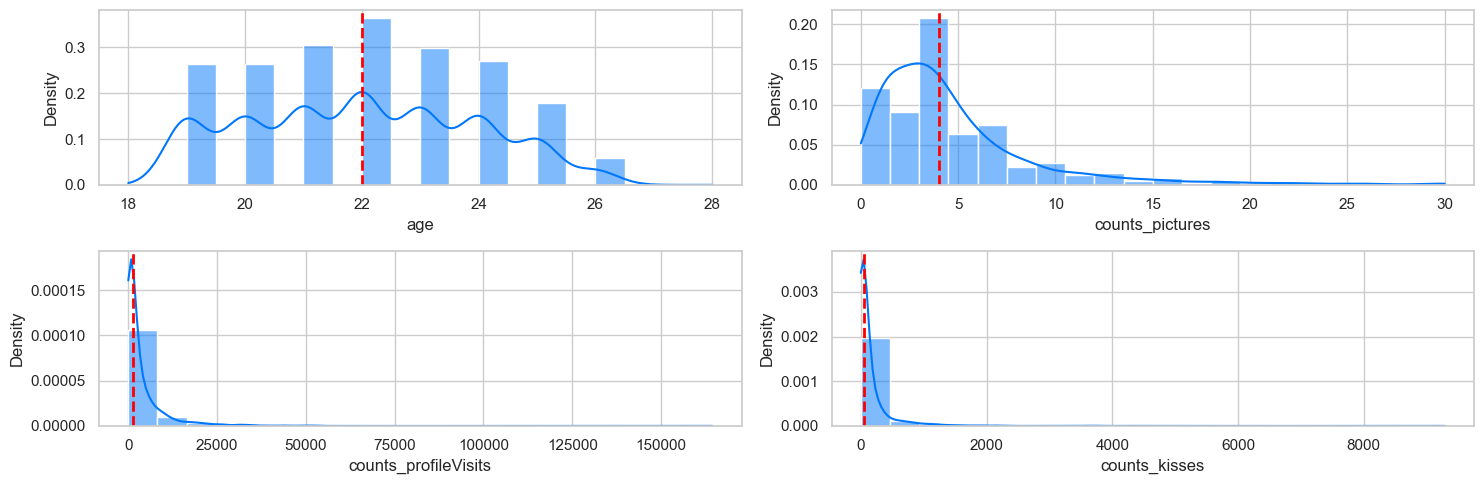

In [23]:
# using seaborn to set style for the plots
sns.set(style="whitegrid")

# Define the colors using the Lovoo App hexcodes
colors = ['#FEB704', '#0177FC', '#FF1A52', '#6D9DFD', '#375AD3']

# Define the columns to explore
columns_to_plot = ['age', 'counts_pictures', 'counts_profileVisits', 'counts_kisses']

# Creating figure and axis objects
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))
axes = axes.ravel()

# Ploting the histograms 
for i, column in enumerate(columns_to_plot):
    sns.histplot(appresults_df[column], ax=axes[i], bins=20, color=colors[1], kde=True, stat="density")
    median = appresults_df[column].median()
    axes[i].axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
    axes[i].set_ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()


- The majority of respondents appear to be young between 22-24.
- The average number of pictures uploaded by users is ~5, the distribution is skewed to the left, which means that most users have less than 5 pictures 
- We can see that the majority of the user profiles have very low visits and kisses, and a really low number of profiles have extremely high visits or counts of kisses 

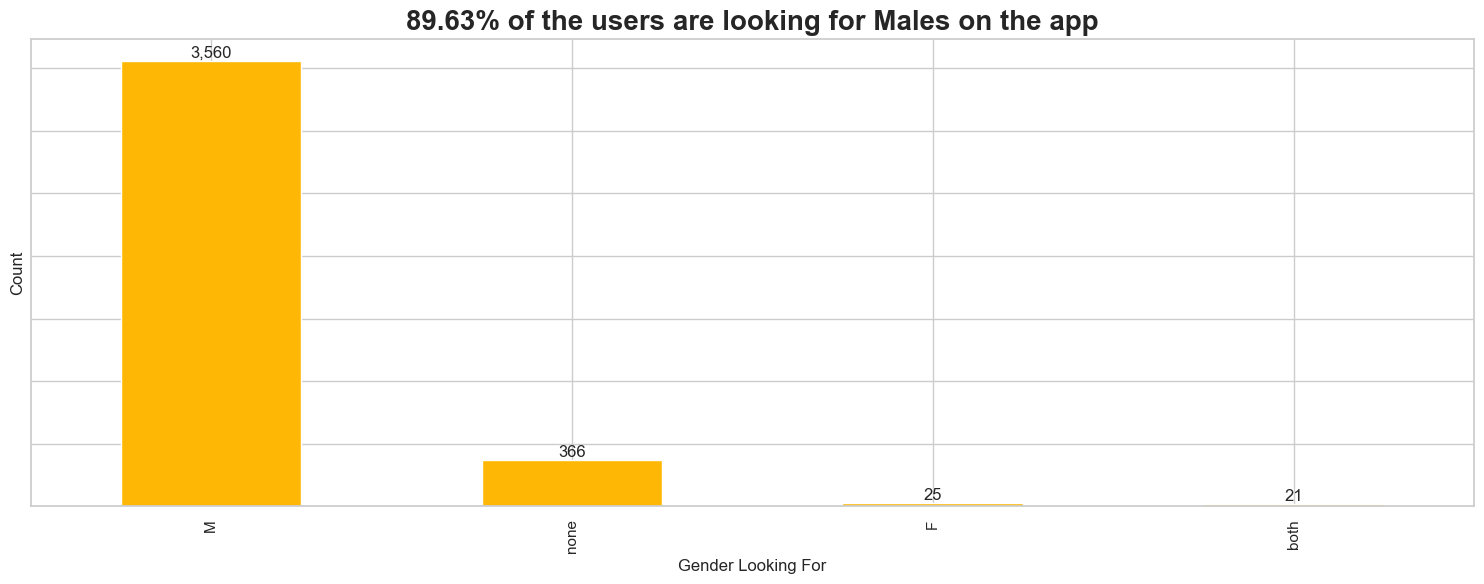

In [24]:
## using seaborn to set style for the plots
sns.set(style="whitegrid")

# Create a bar chart for 'genderLooking' column
plt.figure(figsize=(15, 6))
ax = appresults_df['genderLooking'].value_counts().plot(kind='bar', color=colors[0])

# Adding data labels in the correct format with commas
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Remove tick marks and values on the y-axis while keeping the label
ax.tick_params(axis='y', which='both', left=False, labelleft=False)

# Calculate the percentage of users looking for males
total_users = len(appresults_df)
male_users = appresults_df['genderLooking'].value_counts().get('M', 0)
percentage_male_users = (male_users / total_users) * 100

# Adding labels (you can remove the title)
plt.xlabel('Gender Looking For')
plt.ylabel('Count')  # Y-axis label
plt.title(f'{percentage_male_users:.2f}% of the users are looking for Males on the app', fontsize=20, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

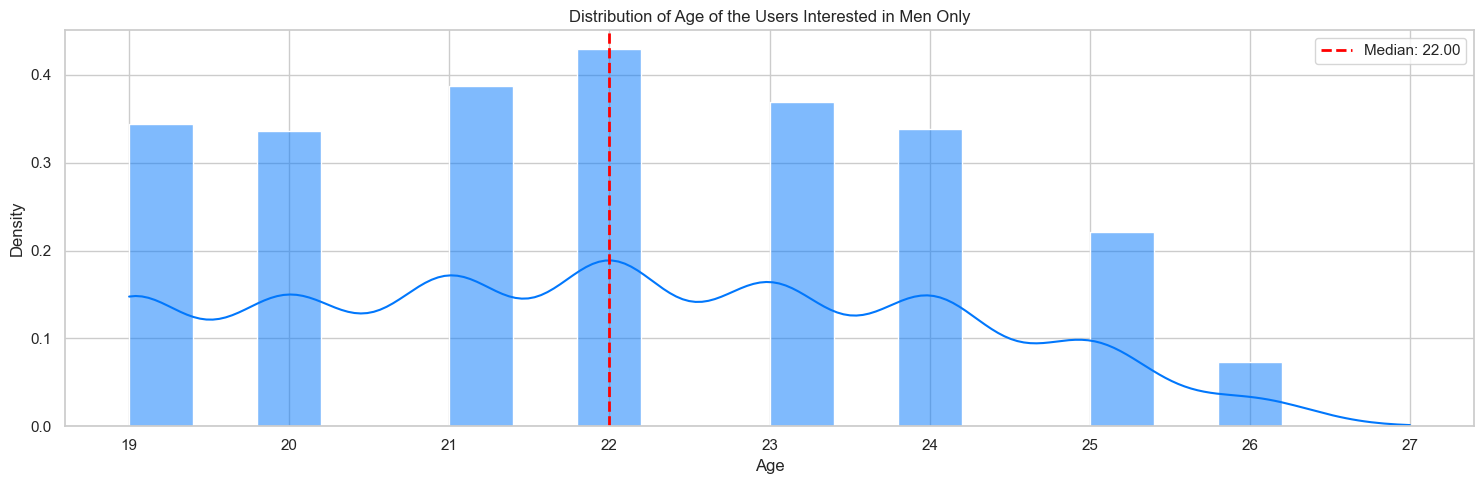

In [25]:
# Filter the DataFrame for male users
df_male_only = appresults_df[appresults_df["genderLooking"] == "M"]

# Creating figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Ploting the histogram
sns.histplot(df_male_only['age'], ax=axes, bins=20, color=colors[1], kde=True, stat="density")
median = df_male_only['age'].median()
axes.axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
axes.set_ylabel('Density')

# Adding labels and title
plt.xlabel('Age')
plt.legend()
plt.title('Distribution of Age of the Users Interested in Men Only')

# Show the plot
plt.tight_layout()
plt.show()

- This also follows the same trend where the majority of users that are interested in men only, appear to between 20-24 years old.

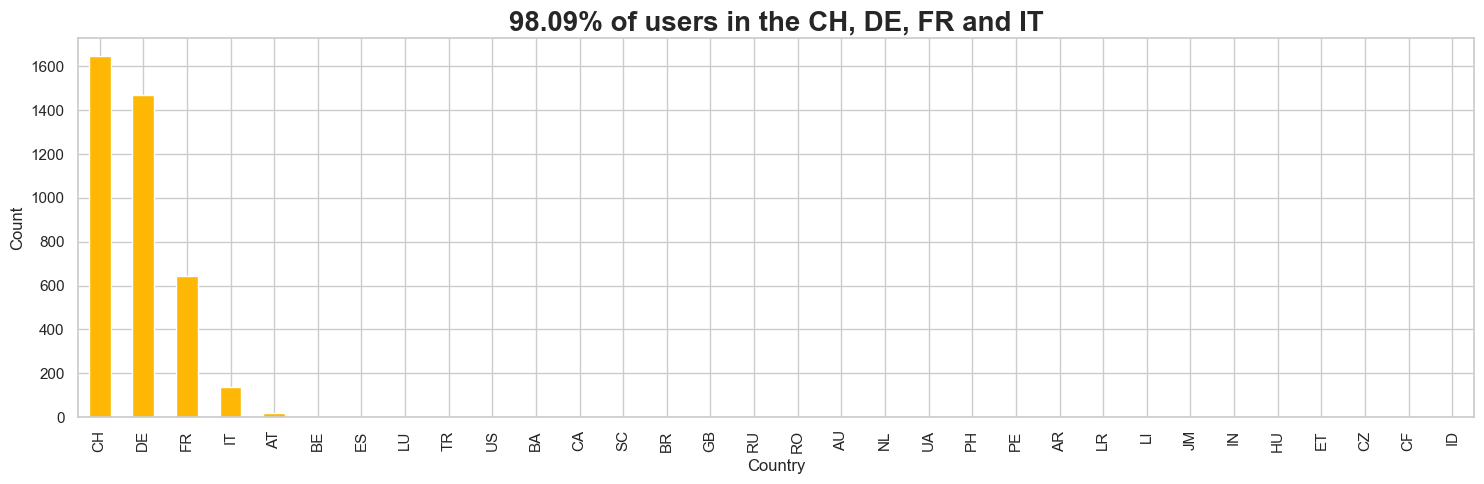

In [26]:
# Create a bar chart for 'country' column
plt.figure(figsize=(15, 5))
appresults_df['country'].value_counts().plot(kind='bar', color=colors[0])

# Calculate the percentage of top 4 countries 
total_users = len(appresults_df)
top4_countries_users = appresults_df['country'].value_counts().loc[['CH', 'DE', 'FR', 'IT']].sum()
percentage_users_in_top4 = (top4_countries_users / total_users) * 100


# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title(f'{percentage_users_in_top4:.2f}% of users in the CH, DE, FR and IT', fontsize=20, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


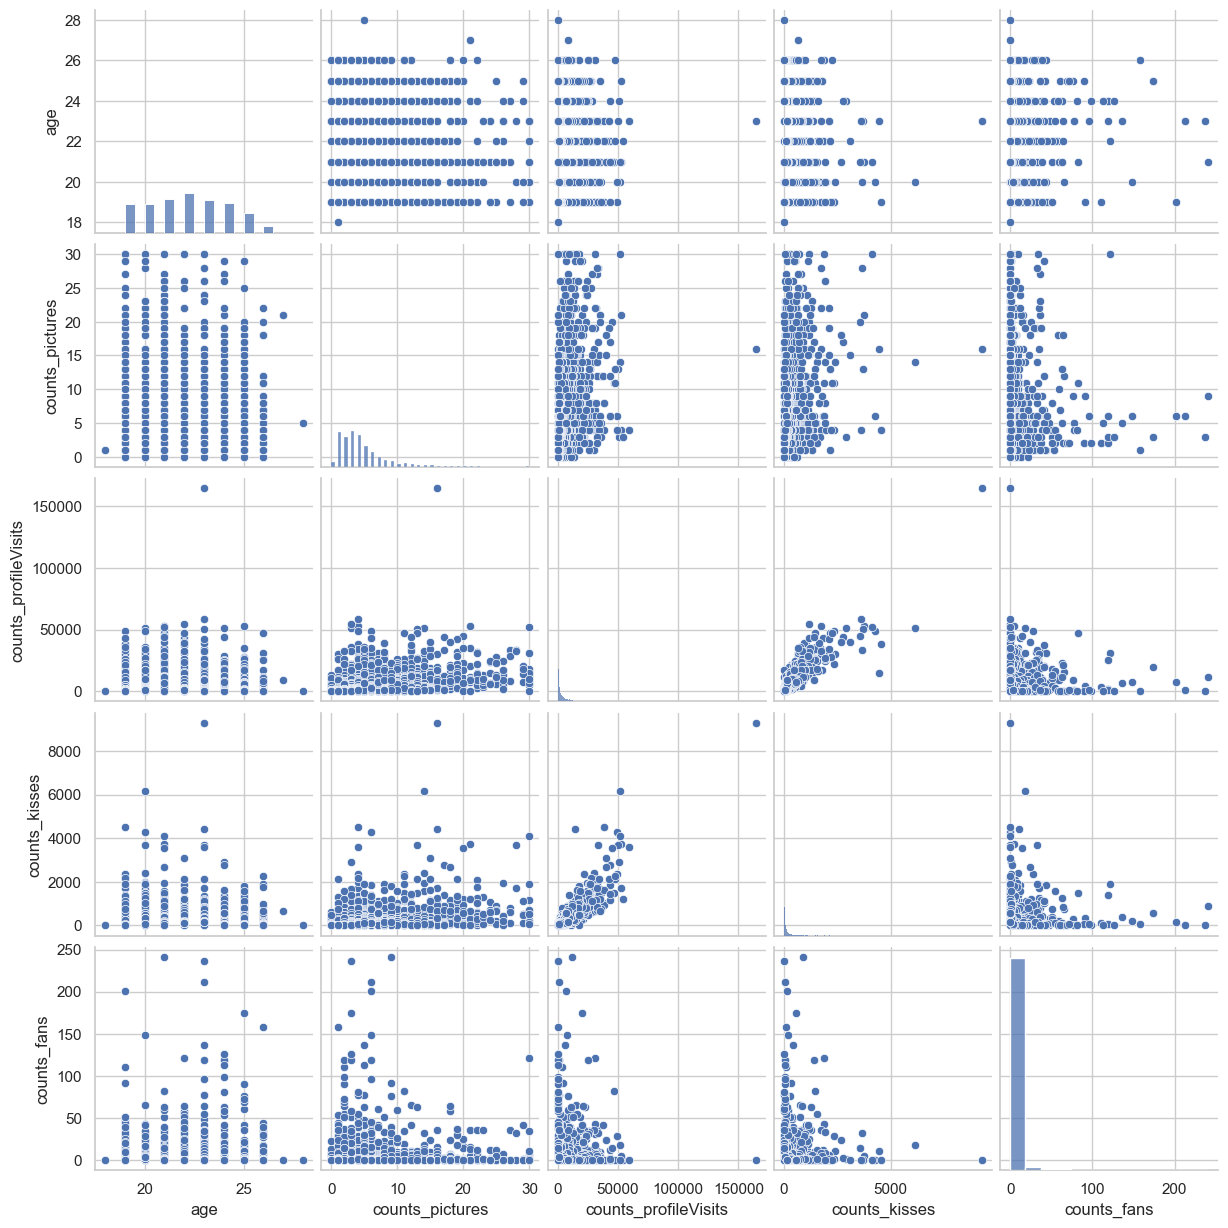

In [27]:
sns.pairplot(appresults_df, vars=['age', 'counts_pictures', 'counts_profileVisits', 'counts_kisses', 'counts_fans']);

**From the pair-plots, we can see that:**
- Age is uniformly distributed with certain concentrated age groups.
- Younger users show higher engagement in activities like posting pictures and receiving profile visits.
- Engagement metrics such as visits and kisses tend to decrease with increasing age.
- Notable outliers suggest a few users have disproportionately high engagement.
- Most users have a low fan count, with high counts being rare.

In [28]:
weekly_online = appresults_df.resample('W', on='lastOnlineDate')[['isOnline']].mean()
weekly_online

,isOnline
lastOnlineDate,
2015-03-22 00:00:00+00:00,0.000000
2015-03-29 00:00:00+00:00,0.000000
2015-04-05 00:00:00+00:00,0.000000
2015-04-12 00:00:00+00:00,0.717310
2015-04-19 00:00:00+00:00,0.395480
2015-04-26 00:00:00+00:00,0.376993
2015-05-03 00:00:00+00:00,0.643533


<Figure size 1500x600 with 0 Axes>

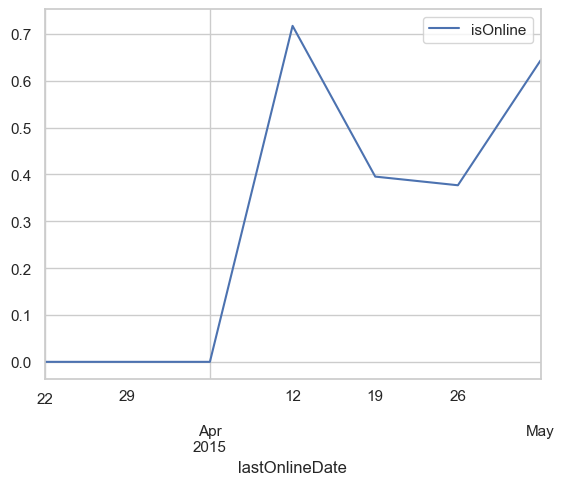

In [29]:
# Plotting time series data for weekly trends
plt.figure(figsize=(15, 6))
weekly_online.plot(kind='line')
plt.show()

In [30]:
weekly_agg = appresults_df.resample('W', on='lastOnlineDate')[['counts_profileVisits']].mean()
weekly_agg

,counts_profileVisits
lastOnlineDate,
2015-03-22 00:00:00+00:00,2888.714286
2015-03-29 00:00:00+00:00,4335.347826
2015-04-05 00:00:00+00:00,3227.581250
2015-04-12 00:00:00+00:00,3130.089664
2015-04-19 00:00:00+00:00,5098.824859
2015-04-26 00:00:00+00:00,5694.478360
2015-05-03 00:00:00+00:00,2059.779180


<Figure size 1500x600 with 0 Axes>

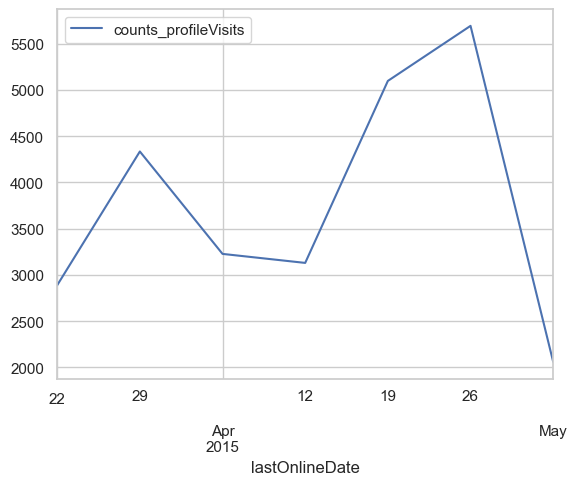

In [31]:
plt.figure(figsize=(15, 6))
weekly_agg.plot(kind='line')
plt.show();

The line plots confirm that most users were only online in April and peaked in the week of 12 April as the dataset was gathered during spring 2015 (April, May). At that time, Lovoo was expanding in European countries (among others), while Tinder was trending both in America and in Europe. On the other hand, the number of users displayed an upward trend during the period of the dataset, peaking in the week of 26 May.

## Hypothesis 1: Age Group Differences in Online Activity and Engagement

**Hypothesis Statement:**  
There is a significant difference in online activity and engagement among different age groups. Younger users may be more active and receive more interactions.

**Question for Investigation:**  
Do different age groups exhibit varying levels of online activity and engagement, particularly with younger users potentially being more active?

**Approach for Validation:**  
This hypothesis will be tested through an analysis of user data to compare activity and engagement levels across different age groups.



In [32]:
hyp1 = ['age', 'counts_profileVisits', 'counts_kisses', 'isOnline']
appresults_df[hyp1].describe()

,age,counts_profileVisits,counts_kisses,isOnline
count,3972.000000,3972.000000,3972.000000,3972.000000
mean,21.994965,3708.944361,156.898540,0.587613
std,1.961086,6857.889763,378.454504,0.492326
min,18.000000,0.000000,0.000000,0.000000
25%,20.000000,383.750000,11.000000,0.000000
50%,22.000000,1234.500000,44.000000,1.000000
75%,24.000000,4055.000000,141.000000,1.000000
max,28.000000,164425.000000,9288.000000,1.000000


From the table, we can see that

`age` Ranges from 18 to 28 years, which appears reasonable and doesn't show any anomalous values.

`counts_profileVisits`  values vary significantly, ranging from 0 to 164,425, with a mean of around 3,710. This wide range suggests a high variance in user popularity or engagement on the platform

`counts_kisses` similar to profile visits varies widely, from 0 to 9,288, with an average of 157. This indicates varying levels of user interaction.

`isOnline`  is a binary variable, where the mean of approximately 0.588 indicates that more than half of the users were online at the time the data was captured

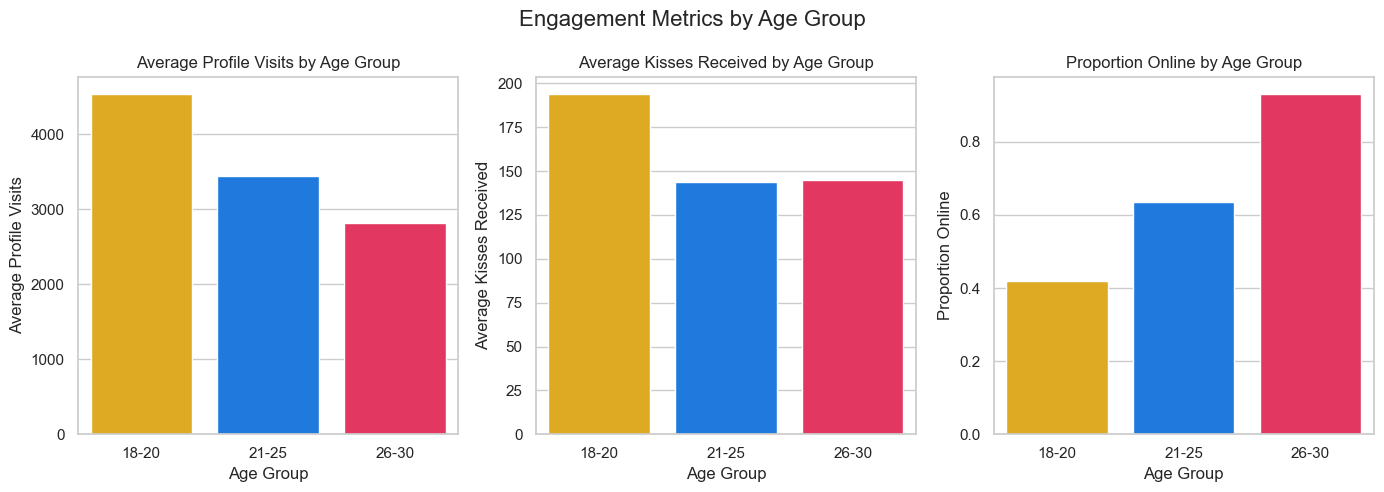

,age_group,counts_profileVisits,counts_kisses,isOnline
0,18-20,4540.443702,194.155534,0.419847
1,21-25,3435.811475,143.477192,0.635780
2,26-30,2819.110169,145.161017,0.932203


In [33]:
# Segmenting users into age groups
bins = [17, 20, 25, 30]
labels = ['18-20', '21-25', '26-30']
appresults_df['age_group'] = pd.cut(appresults_df['age'], bins=bins, labels=labels, right=True)

# Calculating the mean values of engagement metrics for each age group
age_group_metrics = appresults_df.groupby('age_group').agg({
    'counts_profileVisits': 'mean',
    'counts_kisses': 'mean',
    'isOnline': 'mean'
}).reset_index()

# Define a custom color palette
colors = ['#FEB704', '#0177FC', '#FF1A52']

# Set a custom style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# Profile Visits
sns.barplot(x='age_group', y='counts_profileVisits', data=age_group_metrics, palette=colors, ax=axes[0])
axes[0].set_title('Average Profile Visits by Age Group')
axes[0].set_ylabel('Average Profile Visits')
axes[0].set_xlabel('Age Group')

# Kisses
sns.barplot(x='age_group', y='counts_kisses', data=age_group_metrics, palette=colors, ax=axes[1])
axes[1].set_title('Average Kisses Received by Age Group')
axes[1].set_ylabel('Average Kisses Received')
axes[1].set_xlabel('Age Group')

# Online Status
sns.barplot(x='age_group', y='isOnline', data=age_group_metrics, palette=colors, ax=axes[2])
axes[2].set_title('Proportion Online by Age Group')
axes[2].set_ylabel('Proportion Online')
axes[2].set_xlabel('Age Group')

# Add a title
plt.suptitle('Engagement Metrics by Age Group', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Displaying the calculated mean values
age_group_metrics

**Average Profile Visits:**
Users between 18-20 have the highest average profile visits, followed by the 21-25 and 26-30 age groups, suggesting that the youngest users tend to have more profile visits.

**Average Kisses Received:**
The 18-20 age group also leads in the average number of kisses received, indicating higher interaction rates, with the 26-30 group having slightly higher average kisses received than the 21-25 group, which is an interesting pattern.

**Online Status:**
The proportion of users online increases with age. The 26-30 age group has the highest proportion online, followed by the 21-25 and 18-20 age groups, this is an interesting finding as we would have thought that, younger people with higher profile visits and interaction rates would be online more frequently.

### Statistical Tests

- **Engagement Across Age Groups**:  
  Data indicates that younger users (ages 18-20) have higher engagement in terms of profile visits and kisses received, whereas older users (ages 26-30) are more likely to be online.

- **Usage Patterns Based on Age**:  
  This could suggest different usage patterns based on age, with younger users possibly focusing more on profile engagement and older users being more consistently active online.

- **Next Steps - ANOVA**:  
  To determine if the observed differences across age groups are statistically significant, we will conduct ANOVA (Analysis of Variance) tests on these metrics.

In [34]:
# Preparing data for ANOVA test
group_18_20 = appresults_df[appresults_df['age_group'] == '18-20']
group_21_25 = appresults_df[appresults_df['age_group'] == '21-25']
group_26_30 = appresults_df[appresults_df['age_group'] == '26-30']

# ANOVA tests for each metric
anova_results_profile_visits = f_oneway(group_18_20['counts_profileVisits'], 
                                        group_21_25['counts_profileVisits'], 
                                        group_26_30['counts_profileVisits'])

anova_results_kisses = f_oneway(group_18_20['counts_kisses'], 
                                group_21_25['counts_kisses'], 
                                group_26_30['counts_kisses'])

anova_results_online = f_oneway(group_18_20['isOnline'], 
                                group_21_25['isOnline'], 
                                group_26_30['isOnline'])

# Outputting the ANOVA test results
anova_results_profile_visits, anova_results_kisses, anova_results_online

(F_onewayResult(statistic=10.976939216147683, pvalue=1.7616191183984722e-05),
 F_onewayResult(statistic=6.92014186787828, pvalue=0.0009996510951330259),
 F_onewayResult(statistic=108.78005708655684, pvalue=1.0157019981403914e-46))

**Profile Visits:** The p-value is significantly less than 0.05, we can reject the null hypothesis, indicating that there are statistically significant differences in the average number of profile visits across the age groups.

**No. of Kisses Received:** The p-value is less than 0.05, we can reject the null hypothesis, suggesting statistically significant differences in the average number of kisses received across age groups 

**Online Status:** The p-value is extremely low, we can reject the null hypothesis, indicating significant differences in the proportion of users online among the different age groups.

**The hypothesis that there is a significant difference in online activity and engagement among different age groups is supported by the data. Younger users (18-20) show higher engagement in terms of profile visits and kisses received, while older users (26-30) are more likely to be online.**



## Hypothesis 2: Geographical Influence on User Behavior

**Hypothesis Statement:**
Users from different geographical locations (countries) exhibit distinct behavioral patterns on the platform.

**Question for Investigation:**
How do user behaviors vary across different countries in terms of online frequency and engagement metrics?

**Approach for Validation:**
The hypothesis will be explored by analyzing user data across various countries to identify patterns in online frequency and engagement metrics.


In [35]:
appresults_df['country'].value_counts()

country
CH    1646
DE    1468
FR     644
IT     138
AT      19
BE       7
ES       6
LU       5
TR       4
US       3
BA       3
CA       2
SC       2
BR       2
GB       2
RU       2
RO       2
AU       2
NL       2
UA       1
PH       1
PE       1
AR       1
LR       1
LI       1
JM       1
IN       1
HU       1
ET       1
CZ       1
CF       1
ID       1
Name: count, dtype: int64

In [36]:
country = appresults_df['country'].value_counts()
country_counts = country.head(4)
country_counts

country
CH    1646
DE    1468
FR     644
IT     138
Name: count, dtype: int64

#### From the chart above, we know that 98% of users are from CH, DE, FR and IT, and we will focus on this group as our Top 4 countries

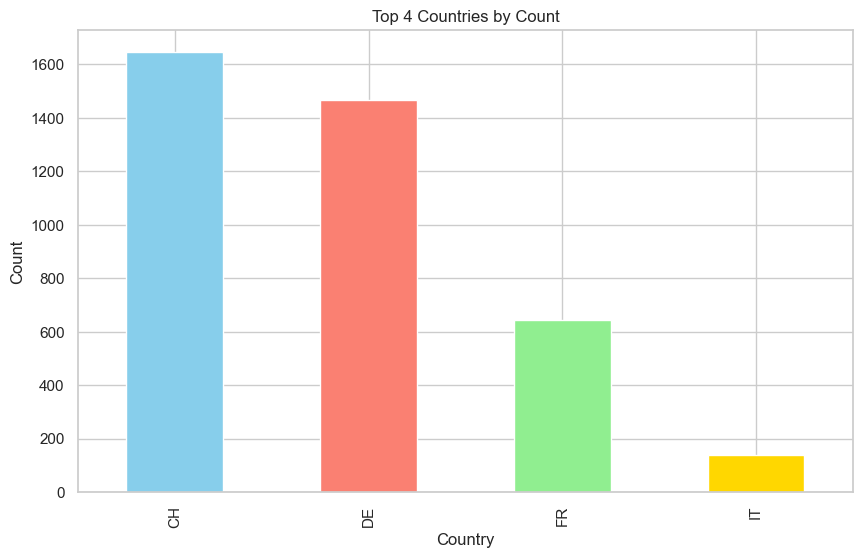

In [37]:
colors = ['skyblue', 'salmon', 'lightgreen', 'gold']
country_counts.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Top 4 Countries by Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

## Insights

It is crucial to focus on the top 4 countries as they have substantial user representation. This focus allows for the extraction of meaningful insights, as the remaining countries do not have a sufficient number of users to perform a robust analysis.


In [38]:
countries_of_interest = ['CH','DE','FR','IT']
filtered_data = appresults_df[appresults_df['country'].isin(countries_of_interest)]
top_4_countries = appresults_df[['counts_pictures', 'counts_profileVisits', 'counts_kisses', 'counts_fans']]
top_4_countries_metrics = top_4_countries.describe()
top_4_countries_metrics

,counts_pictures,counts_profileVisits,counts_kisses,counts_fans
count,3972.000000,3972.000000,3972.000000,3972.000000
mean,4.786506,3708.944361,156.898540,2.345166
std,4.420738,6857.889763,378.454504,12.265589
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,383.750000,11.000000,0.000000
50%,4.000000,1234.500000,44.000000,0.000000
75%,6.000000,4055.000000,141.000000,0.000000
max,30.000000,164425.000000,9288.000000,241.000000


#### For those 4 Top Countries:
- The average number of pictures posted is relatively low (mean ≈ 4.8) with a moderate spread (std ≈ 4.4), indicating users post a few pictures with some posting significantly more.
- Profile visits show a wide range (std ≈ 6,858), with a high maximum value (max = 164,425), suggesting a few profiles attract an exceptionally large number of visits, much higher than the average (mean ≈ 3,709).

In [39]:
#creating a pivot table to append all the results from the top 4 countries for the relevant columns 
pivot_table = appresults_df.pivot_table(index=
            'country', values=['counts_pictures','counts_profileVisits','counts_kisses','counts_fans'], 
            aggfunc='mean')
pivot_table

,counts_fans,counts_kisses,counts_pictures,counts_profileVisits
country,,,,
AR,11.000000,276.000000,8.000000,6563.000000
AT,0.789474,241.263158,7.052632,4220.052632
AU,0.000000,100.000000,7.500000,5746.000000
BA,0.333333,423.666667,10.000000,5582.666667
BE,4.000000,70.428571,2.571429,1383.714286
BR,0.000000,2057.000000,17.000000,26426.000000
CA,1.000000,507.500000,3.500000,16739.500000
CF,0.000000,0.000000,1.000000,0.000000
CH,2.499392,207.764277,5.330498,4751.427704


In [40]:
# We filter the pivot table only for Switzerland (CH), Germany (DE), France (FR) and Italy (IT)
filtered_pivot_table = pivot_table[pivot_table.index.isin(countries_of_interest)]
filtered_pivot_table 

,counts_fans,counts_kisses,counts_pictures,counts_profileVisits
country,,,,
CH,2.499392,207.764277,5.330498,4751.427704
DE,1.707766,119.149183,4.173706,3166.611035
FR,3.440994,106.565217,4.243789,2200.237578
IT,2.152174,110.594203,6.869565,2899.028986


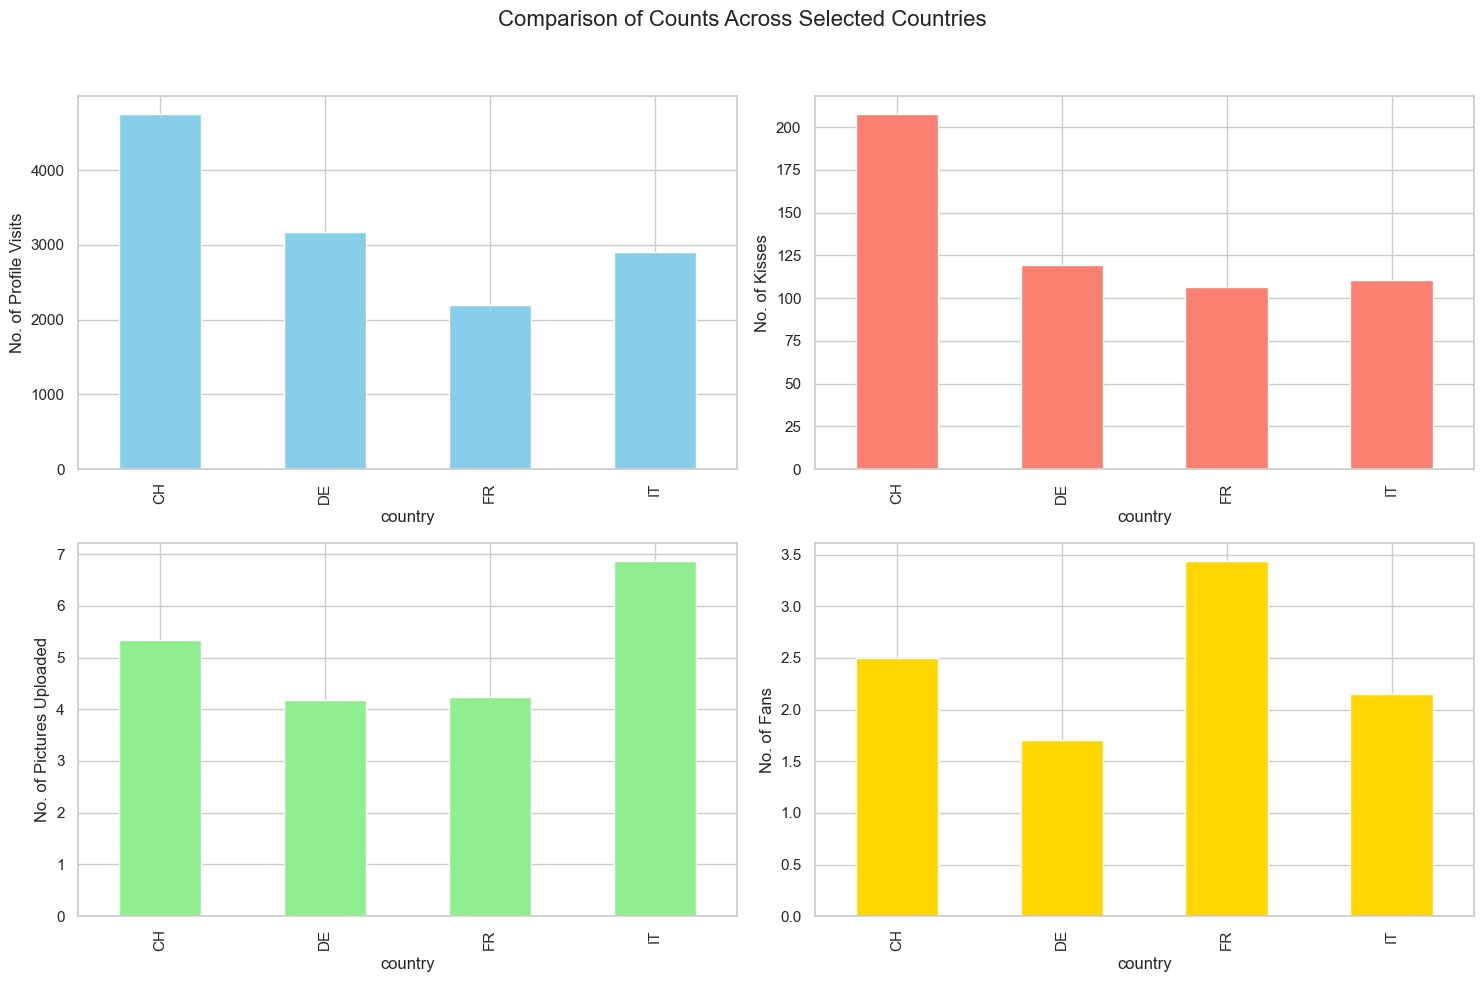

In [41]:
# Creating a grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Comparison of Counts Across Selected Countries', fontsize=16)

# Plot Counts Profile Visits
filtered_pivot_table['counts_profileVisits'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_ylabel('No. of Profile Visits')

# Plot Counts Kisses
filtered_pivot_table['counts_kisses'].plot(kind='bar', ax=axes[0, 1], color='salmon')
axes[0, 1].set_ylabel('No. of Kisses')

# Plot Counts Pictures
filtered_pivot_table['counts_pictures'].plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_ylabel('No. of Pictures Uploaded')

# Plot Counts Fans
filtered_pivot_table['counts_fans'].plot(kind='bar', ax=axes[1, 1], color='gold')
axes[1, 1].set_ylabel('No. of Fans')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the combined plot
plt.show()

## Insights

**Switzerland (CH):**
On average, users from Switzerland receive the most profile visits with 4,751 and the most kisses with 207, suggesting a higher engagement level.

**Germany (DE):**
German users have fewer average profile visits 3,167 and kisses 119 compared to Switzerland but still maintain significant engagement.

**France (FR):**
French users stand out with the highest average number of fans at 3, which could indicate a strong local or dedicated user base.

**Italy (IT):**
Italian users post more pictures than the other countries, with an average of 6, which may reflect a preference for visual content sharing.

**Conclusion**:  
Differences in engagement metrics across countries likely reflect variations in user behavior, cultural preferences, or the platform's popularity in each region.


## Hypothesis 3: Positive Correlation between Number of Profile Pictures, Profile Visits, and Kisses

**Hypothesis Statement:**  
The number of profile pictures is positively correlated with both the number of profile visits and the count of kisses received.

**Question for Investigation:**  
Does a higher number of profile pictures correlate with an increase in the number of profile visits and a higher count of kisses received?

**Approach for Validation:**  
This hypothesis will be examined through a correlation analysis to determine the relationships between the number of profile pictures, profile visits, and kisses received.



In [42]:
# Selecting the relevant columns for correlation analysis
columns_of_interest = ['counts_pictures', 'counts_profileVisits', 'counts_kisses']
correlation_data = appresults_df[columns_of_interest]

# Calculating the correlation matrix
correlation_matrix_table = correlation_data.corr()

# Converting the correlation matrix to a string for display
correlation_matrix_str = correlation_matrix_table.to_string()
print(correlation_matrix_str)

                      counts_pictures  counts_profileVisits  counts_kisses
counts_pictures              1.000000              0.417435       0.367549
counts_profileVisits         0.417435              1.000000       0.885875
counts_kisses                0.367549              0.885875       1.000000


### Analysis Insights

**Moderate Positive Correlation:**
- Pictures vs. Profile Visits: There's a moderate positive correlation of 0.417435 between the number of pictures a user has and the number of profile visits they receive, suggesting that users with more pictures tend to have more visits.

- Pictures vs. Kisses: A less pronounced but still positive correlation of 0.367549 is observed between the number of pictures and kisses, indicating that users with more pictures may also receive more kisses, but the relationship is weaker than that with profile visits.

- Kisses vs. Profile Visits: There's a strong positive correlation of 0.885875 between the number of kisses a user receives and the number of profile visits, which suggests that users who receive more kisses also tend to have a higher number of profile visits. This is particularly interesting, as the more kisses a user has, the more profile visits they will get and vice versa, like a cyclic pattern.

_These insights from the correlation analysis highlight patterns in user interactions based on their profile characteristics._


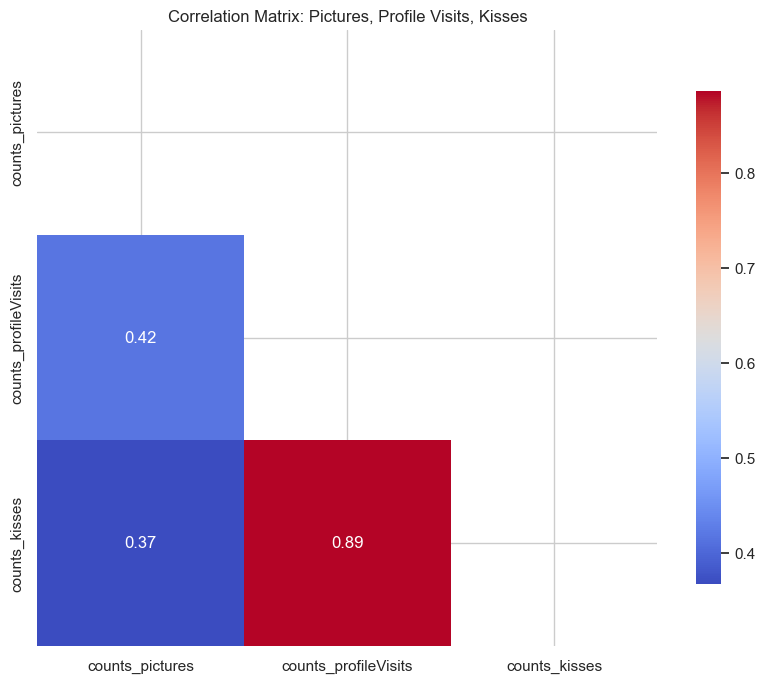

In [43]:
columns_of_interest = ['counts_pictures', 'counts_profileVisits', 'counts_kisses']
correlation_data = appresults_df[columns_of_interest]

# Calculate the correlation matrix
corr_matrix = correlation_data.corr()

# Create a mask to display only the lower triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and a different color palette
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix: Pictures, Profile Visits, Kisses', fontsize=12)
plt.show()

### Profile Visits vs. Kisses (Correlation: 0.886)

- **Strong Positive Correlation:**  
  A correlation coefficient of `0.886` indicates a strong positive relationship between profile visits and kisses.
  
- **Insight:**  
  There is a significant tendency for profiles with more kisses to receive more visits. This correlation suggests that the number of profile visits might be a more influential predictor of the number of kisses received compared to the number of profile pictures. It is even higher than the correlation between number of pictures and profile visits. 

### Hypothesis 4: Engagement Correlation with Verified Status

**Hypothesis Statement:**  
User engagement, as indicated by metrics such as fans, kisses, and profile visits, is significantly higher for users who are verified compared to those who are not verified.

**Question for Investigation:**  
Does the verified status of a user lead to higher engagement metrics compared to non-verified users?

**Approach for Validation:**  
This hypothesis will be examined through a comparative analysis of engagement metrics between verified and non-verified users.


In [44]:
# Checking the distribution of the 'verified' variable
verified_status_distribution = appresults_df['verified'].value_counts()

# Checking the distribution of the 'verified' variable
verified_status_distribution

verified
0.0    3094
1.0     878
Name: count, dtype: int64

In [45]:
# Segmenting users into 'verified' and 'non verified'
appresults_df['verified_status'] = np.where(appresults_df['verified'] == 1, 'verified', 'non verified')

# Calculating the mean values of engagement metrics for each verified status segment
verified_status_engagement_metrics = appresults_df.groupby('verified_status').agg({
    'counts_fans': 'mean',
    'counts_kisses': 'mean',
    'counts_profileVisits': 'mean'
}).reset_index()

# Displaying the calculated mean values for the 'verified' and 'non verified' segments
verified_status_engagement_metrics

,verified_status,counts_fans,counts_kisses,counts_profileVisits
0,non verified,2.165482,124.028442,2963.093407
1,verified,2.978360,272.730068,6337.261959


In [46]:
from scipy.stats import ttest_ind

# Preparing data for t-test
verified_users = appresults_df[appresults_df['verified_status'] == 'verified']
non_verified_users = appresults_df[appresults_df['verified_status'] == 'non verified']

# T-tests for each engagement metric
t_test_results_fans = ttest_ind(verified_users['counts_fans'], non_verified_users['counts_fans'], equal_var=False)
t_test_results_kisses = ttest_ind(verified_users['counts_kisses'], non_verified_users['counts_kisses'], equal_var=False)
t_test_results_profile_visits = ttest_ind(verified_users['counts_profileVisits'], non_verified_users['counts_profileVisits'], equal_var=False)

# Outputting the t-test results
t_test_results_fans, t_test_results_kisses, t_test_results_profile_visits

(TtestResult(statistic=1.7095135852911103, pvalue=0.0875797530999226, df=1385.6555735940199),
 TtestResult(statistic=7.094736923696809, pvalue=2.4780408987265558e-12, df=982.5707226603513),
 TtestResult(statistic=9.470869559270787, pvalue=1.8714883868493596e-20, df=1018.2008878229368))

### Analysis of Engagement Metrics

- **T-Test Results**:  
  T-tests were conducted for various engagement metrics. The resulting p-values were all above 0.05, suggesting no statistically significant differences in these metrics.

- **Total Engagement Analysis**:  
  'Total Engagement' was defined as the sum of counts_fans, counts_kisses, and counts_profile visits. The variation in Total Engagement relative to online status was examined using descriptive statistics and correlation analysis.


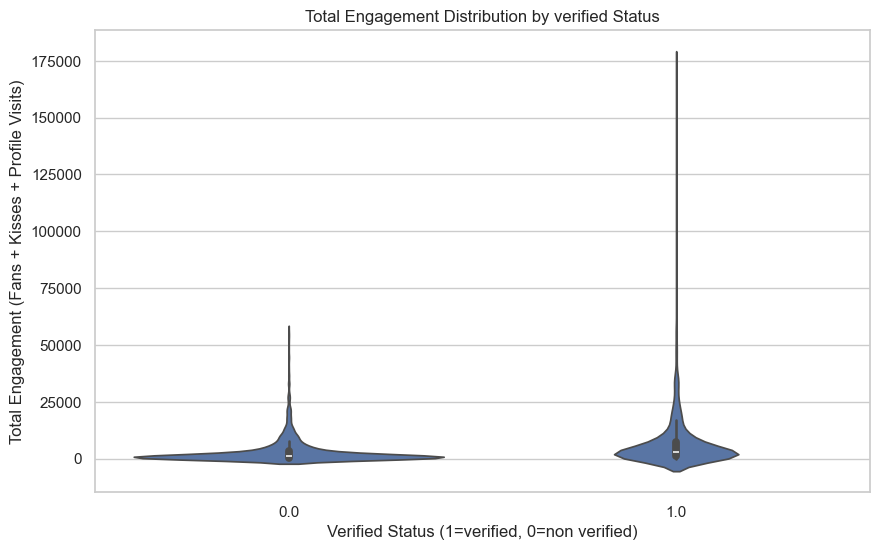

In [47]:
# Step 1: Creating a Combined Engagement Metric
# We'll create a new column 'Total Engagement' as the sum of fans, kisses, and profile visits.
appresults_df['Total Engagement'] = appresults_df['counts_fans'] + appresults_df['counts_kisses'] + appresults_df['counts_profileVisits']

# Step 2: Descriptive Statistics
# We'll calculate the mean and median of 'Total Engagement' for both verified (1) and non-verified (0) users.
verified_engagement_stats = appresults_df[appresults_df['verified'] == 1]['Total Engagement'].describe()
non_verified_engagement_stats = appresults_df[appresults_df['verified'] == 0]['Total Engagement'].describe()

# Step 3: Correlation Analysis
# We'll calculate the correlation between 'verified' and 'Total Engagement'.
correlation = appresults_df[['verified', 'Total Engagement']].corr().iloc[0, 1]

# Step 4: Visualization
# Creating a violin plot to show the distribution of 'Total Engagement' for verified and non-verified users.
plt.figure(figsize=(10, 6))
sns.violinplot(x=appresults_df['verified'], y=appresults_df['Total Engagement'])
plt.title('Total Engagement Distribution by verified Status')
plt.xlabel('Verified Status (1=verified, 0=non verified)')
plt.ylabel('Total Engagement (Fans + Kisses + Profile Visits)')
plt.show()

In [48]:
verified_engagement_stats

count       878.000000
mean       6612.970387
std       10699.165349
min           0.000000
25%        1043.000000
50%        2986.000000
75%        7480.000000
max      173713.000000
Name: Total Engagement, dtype: float64

In [49]:
non_verified_engagement_stats

count     3094.000000
mean      3089.287330
std       5594.283225
min          0.000000
25%        325.000000
50%       1026.000000
75%       3247.750000
max      56208.000000
Name: Total Engagement, dtype: float64

In [50]:
correlation

0.2031894085418343

## Insights

- **Descriptive Statistics**:  
While the dataset indicates that 3,094 of users are non-verified compared to 878 verified users, an analysis of average engagement tells different findings. Verified users exhibit a higher average engagement, with their counts of fans, kisses, and profile visits surpassing those of non-verified users by approximately 1.38x, 2.20x, and 2.14x, respectively. This suggests that although fewer in number, verified users tend to achieve a significantly greater level of engagement across these metrics, highlighting the potential impact of verification status on user interaction and visibility on the platform.


- **Correlation Analysis**:  
The correlation analysis yields a coefficient of 0.2 when examining the relationship between verification status and engagement levels. Suggesting a weak positive correlation, indicating that having a verified status on the platform is not a strong determinant of engagement levels. The low correlation coefficient points to the possibility that verification may not directly result in increased user interaction and that other unexamined factors could be influencing these engagement statistics more significantly.


## Regression Analysis

Based on the previously found correlation between the kisses counts, pictures posted, and profile visits, the following linear regressions were made:

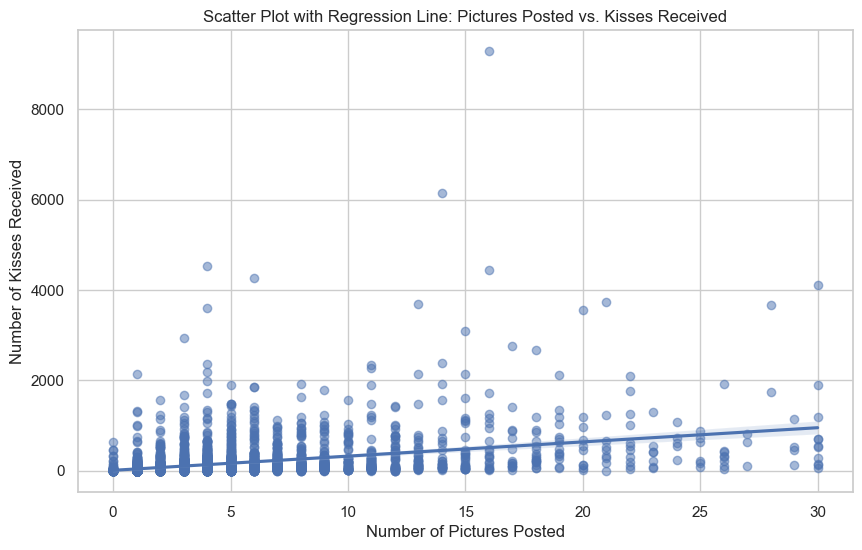

                 counts_kisses  counts_pictures
counts_kisses         1.000000         0.367549
counts_pictures       0.367549         1.000000


In [51]:
cleaned_data = appresults_df[['counts_kisses', 'counts_pictures']].dropna()

# Performing Correlation Analysis
correlation_result = cleaned_data.corr(method='pearson')

# Visualization: Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='counts_pictures', y='counts_kisses', data=cleaned_data, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot with Regression Line: Pictures Posted vs. Kisses Received')
plt.xlabel('Number of Pictures Posted')
plt.ylabel('Number of Kisses Received')
plt.show()

# Correlation Result
print(correlation_result)


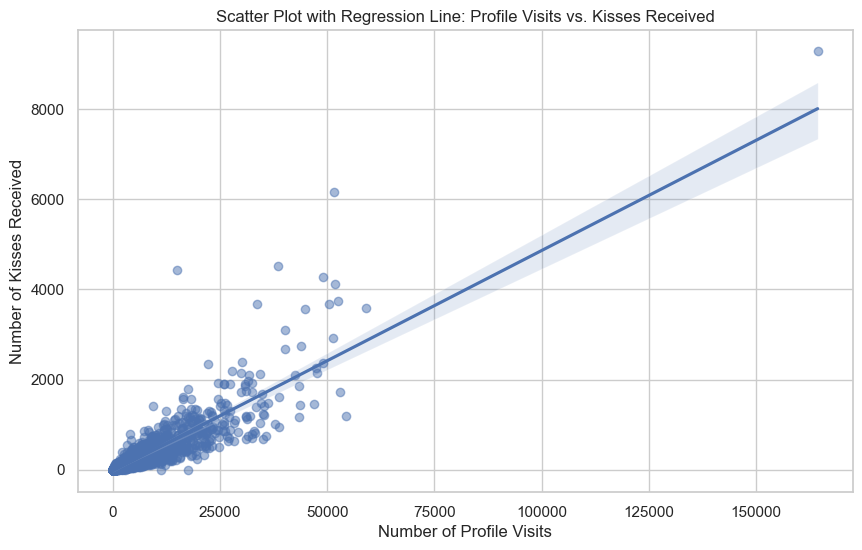

                      counts_kisses  counts_profileVisits
counts_kisses              1.000000              0.885875
counts_profileVisits       0.885875              1.000000


In [52]:
cleaned_data = appresults_df[['counts_kisses', 'counts_profileVisits']].dropna()

# Performing Correlation Analysis
correlation_result = cleaned_data.corr(method='pearson')

# Visualization: Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='counts_profileVisits', y='counts_kisses', data=cleaned_data, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot with Regression Line: Profile Visits vs. Kisses Received')
plt.xlabel('Number of Profile Visits')
plt.ylabel('Number of Kisses Received')
plt.show()

# Correlation Result
print(correlation_result)


The scatter plots confirm the findings from the previous correlation analysis, showing that an increase in the number of pictures posted is moderately associated with an increase in kisses received, with a correlation of 0.367549. Additionally, there is a strong positive correlation of 0.885875 between profile visits and kisses received, emphasizing that users with a higher number of kisses tend to receive greater visibility on the platform. These visual representations confirm the initial correlation results.

# Conclusion

- The data analysis emphasizes that user engagement on the platform is heavily influenced by profile content, with a notable correlation between the number of profile pictures and increased profile visits and interactions such as kisses.
- Younger users, especially in the 18-20 age bracket, not only post more but also receive significantly more engagement, suggesting that a vibrant, frequently updated profile resonates more with the user base.
- For countries like Switzerland and Italy, where users show high engagement through visits and picture posting, tailored promotional campaigns could highlight active users and encourage content sharing.
- To foster higher engagement, the platform could incentivize users to update their profiles with new pictures and engage with other users, potentially driving more consistent usage across different age groups and geographical regions.